# The Most Dangerous Scoreline in Football - a Statistical Analysis of Football Scorelines

"2-0 is the most dangerous lead in football", a phrase that every football fan is sure to have heard more times than they care to count. But why is the use of this phrase such commonplace from commentators and fans alike? and how did it become this way?

The concept behind the phrase is that the winning team may feel too 'comfortable' causing them to lose concentration or become less motivated. This can result in the opposition team scoring a goal to reduce the deficit to just one goal, at which point the opposition team also have the 'momentum' and are more likely to score again. It has also been hypothesised that the phrase may have been coined by broadcasters in an attempt to keep viewers interested in the game. So that's the theory behind the concept, but is there any evidence to support the idea that a two goal lead is in fact dangerous?

This project hopes to answer this very question. To do so, a model will be created with the goal of calculating the probability of each outcome of a football game. That is, by using the minutes played as well as the current scoreline of any given game, find out the probability that a team will win, lose or draw. The result of the model will then be explored.


First import the relevant packages.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [44]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Data

In order to create a model data is required, for this project the data has come from: https://footystats.org/

Premier League match data ranging from the 2007/08 season to the 2018/19 season will be used. 
This comes in the form of 12 CSV files (one for each season), these are combined into a larger data frame containing 4560 rows and 6 columns. Each row represents a single game. The columns represent:

- home_team_name; the name of the home team.
- away_team_name; the name of the away team.
- home_team_goal_count; the total number of goals scored by the home team. 
- away_team_goal_count; the total number of goals scored by the away team. 
- home_team_goal_timings; the time (in minutes) that each goal was scored by the home team,  separated by commas.
- away_team_goal_timings; the time (in minutes) that each goal was scored by the away team, separated by commas.


In [2]:
df1 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2007-to-2008-stats.csv")
df2 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2008-to-2009-stats.csv")
df3 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2009-to-2010-stats.csv")
df4 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2010-to-2011-stats.csv")
df5 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2011-to-2012-stats.csv")
df6 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2012-to-2013-stats.csv")
df7 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2013-to-2014-stats.csv")
df8 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2014-to-2015-stats.csv")
df9 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2015-to-2016-stats.csv")
df10 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2016-to-2017-stats.csv")
df11 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2017-to-2018-stats.csv")
df12 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2018-to-2019-stats.csv")


In [3]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]) #Combine dataframes
df = df.reset_index()

df = pd.DataFrame({'home_team_name' : df['home_team_name'],
                    'away_team_name' : df['away_team_name'],
                    'home_team_goal_count' : df['home_team_goal_count'],
                    'away_team_goal_count' : df['away_team_goal_count'],
                    'home_team_goal_timings' : df['home_team_goal_timings'],
                    'away_team_goal_timings' : df['away_team_goal_timings'], }) #Create dataframe with only relevant columns
df.head()


,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,home_team_goal_timings,away_team_goal_timings
0,Sunderland,Tottenham Hotspur,1,0,90'3,NaN
1,West Ham United,Manchester City,0,2,NaN,"18,87"
2,Middlesbrough,Blackburn Rovers,1,2,30,"63,79"
3,Everton,Wigan Athletic,2,1,"26,75",80
4,Derby County,Portsmouth,2,2,"4,84","27,83"


# Scope of inference

Since the data comes from Premier League games only, it can only be used to predict the outcome of Premier League games. Games that take place in other countries of competitions may give different results.


# Methodology

The model will take two inputs: minutes played and current goal difference. From here it will count the number of times that a game has had this scoreline at the given minutes played and find out what the final result of these games were. The probability of a team winning, losing or drawing based on the current scoreline of the game can then be calculated.

For this project, the exact scoreline will not be considered but the current goal difference i.e. winning 3-1 will be equivalent to winning 2-0. All goals scored in added time will be considered to have been scored in the 45th or 90th minute (depending on which half they were scored) and assuming that every game finished at exactly 90 minutes. This is done because the added time at the end of a football game varies in length, therefore this helps maintain consistency.


# Data Tidying

In order to build the model, the goal timings column must be split into separate columns. The 'hg1' column will show the time that the first goal is scored by the home team, the 'hg2' column will show the time that the second goal is scored by the home team etc.

In [4]:

HGT = df.home_team_goal_timings.str.split(",").apply(pd.Series)
HGT.columns = ['hg1', 'hg2', 'hg3', 'hg4', 'hg5', 'hg6', 'hg7', 'hg8', 'hg9'] #Split goal times into seperate columns


HGT.head(5)
                     

,hg1,hg2,hg3,hg4,hg5,hg6,hg7,hg8,hg9
0,90'3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first row of the first column shows a goal time of 90'3, this represents a goal scored in the third minute of added time. As stated above, all goals scored in extra time will be considered to have been scored in the 90th minute, to do this any character in the string after the 2nd character is removed. 

An 'NaN' value in a column means that the team did not score that many goals. To understand this take the example of the first row: the hg1 column shows 90’3 meaning the team scored their first goal in the 93rd minute, the hg2 column contains NaN meaning the team did not score a second goal, so the team scored one goal in the game.  In order to complete the analysis, all 'NaN' values will be converted to 99 i.e. after the game has finished. 

All values are then converted to floats.




In [5]:
HGT['hg1'] = HGT['hg1'].str[:2]
HGT['hg2'] = HGT['hg2'].str[:2]    
HGT['hg3'] = HGT['hg3'].str[:2]
HGT['hg4'] = HGT['hg4'].str[:2]
HGT['hg5'] = HGT['hg5'].str[:2]
HGT['hg6'] = HGT['hg6'].str[:2]
HGT['hg7'] = HGT['hg7'].str[:2]
HGT['hg8'] = HGT['hg8'].str[:2]
HGT['hg9'] = HGT['hg9'].str[:2] #Remove 'added time' from data

HGT = HGT.fillna(99) # Replace NaN with 99
HGT = HGT.astype(float) #Convert data to floats
HGT.head(5)

,hg1,hg2,hg3,hg4,hg5,hg6,hg7,hg8,hg9
0,90.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
1,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
2,30.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
3,26.0,75.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
4,4.0,84.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0


These steps are then repeated with the away goal timings column.

In [6]:
AGT = df.away_team_goal_timings.str.split(",").apply(pd.Series)
AGT.columns = ['ag1', 'ag2', 'ag3', 'ag4', 'ag5', 'ag6', 'ag7',]

AGT['ag1'] = AGT['ag1'].str[:2]
AGT['ag2'] = AGT['ag2'].str[:2]
AGT['ag3'] = AGT['ag3'].str[:2]
AGT['ag4'] = AGT['ag4'].str[:2]
AGT['ag5'] = AGT['ag5'].str[:2]
AGT['ag6'] = AGT['ag6'].str[:2]
AGT['ag7'] = AGT['ag7'].str[:2]


AGT = AGT.fillna(99)
AGT = AGT.astype(float)
AGT.head(5)

,ag1,ag2,ag3,ag4,ag5,ag6,ag7
0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
1,18.0,87.0,99.0,99.0,99.0,99.0,99.0
2,63.0,79.0,99.0,99.0,99.0,99.0,99.0
3,80.0,99.0,99.0,99.0,99.0,99.0,99.0
4,27.0,83.0,99.0,99.0,99.0,99.0,99.0


A column is created showing the final result of each game. This contains either ‘HOME’ representing a home win, ‘AWAY’ representing an away win or ‘DRAW’ representing a draw.

In [7]:
df['goal_difference'] = df['home_team_goal_count']-df['away_team_goal_count'] #Create goal difference column

df['result'] = np.select([df['goal_difference'] > 0, df['goal_difference'] == 0, df['goal_difference'] < 0],
                        ['HOME', 'DRAW', 'AWAY']) #Create results column 

df.head()

,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,home_team_goal_timings,away_team_goal_timings,goal_difference,result
0,Sunderland,Tottenham Hotspur,1,0,90'3,NaN,1,HOME
1,West Ham United,Manchester City,0,2,NaN,"18,87",-2,AWAY
2,Middlesbrough,Blackburn Rovers,1,2,30,"63,79",-1,AWAY
3,Everton,Wigan Athletic,2,1,"26,75",80,1,HOME
4,Derby County,Portsmouth,2,2,"4,84","27,83",0,DRAW


The formatted data is then combine into a dataframe.

In [8]:
df_model = pd.concat([HGT, AGT], axis=1)
df_model['result'] = df['result']
df_model.head()  # Combine dataframes 

,hg1,hg2,hg3,hg4,hg5,hg6,hg7,hg8,hg9,ag1,ag2,ag3,ag4,ag5,ag6,ag7,result
0,90.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,HOME
1,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,18.0,87.0,99.0,99.0,99.0,99.0,99.0,AWAY
2,30.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,63.0,79.0,99.0,99.0,99.0,99.0,99.0,AWAY
3,26.0,75.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,80.0,99.0,99.0,99.0,99.0,99.0,99.0,HOME
4,4.0,84.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,27.0,83.0,99.0,99.0,99.0,99.0,99.0,DRAW


# Model building

First a function that will return the current goal difference of a game at minutes played, t.
The function home_goals(t)  returns a list of length 4560 with the number of goals scored by the home team at t. The function away_goals(t) does the same for goals scored by the away team. goal_diff(t) then subtracts away_goals(t) from home_goals(t) and returns a list of length 4560 with each game's goal difference. A positive value indicates the home team is winning and a negative value indicates the away team is winning at t. 


In [9]:
def home_goals (t):
            goals_list = []                #create empty list
            for i in range(0,4559):
                if (t >= df_model['hg9'][i]):
                    goals = 9
                elif (t >= df_model['hg8'][i]):
                    goals = 8
                elif (t >= df_model['hg7'][i]):
                    goals = 7
                elif (t >= df_model['hg6'][i]):
                    goals = 6    
                elif (t >= df_model['hg5'][i]):
                    goals = 5
                elif (t >= df_model['hg4'][i]):
                    goals = 4
                elif (t >= df_model['hg3'][i]):
                    goals = 3
                elif (t >= df_model['hg2'][i]):
                    goals = 2
                elif (t >= df_model['hg1'][i]):
                    goals = 1
                else: 
                    goals = 0          #find score at time t

                goals_list.append(goals)  #add score to list

            return(goals_list)          


In [10]:
def away_goals (t):
            goals_list = []                #create empty list
            for i in range(0,4559):
                if (t >= df_model['ag7'][i]):
                    goals = 7
                elif (t >= df_model['ag6'][i]):
                    goals = 6    
                elif (t >= df_model['ag5'][i]):
                    goals = 5
                elif (t >= df_model['ag4'][i]):
                    goals = 4
                elif (t >= df_model['ag3'][i]):
                    goals = 3
                elif (t >= df_model['ag2'][i]):
                    goals = 2
                elif (t >= df_model['ag1'][i]):
                    goals = 1
                else: 
                    goals = 0          #find score at time x

                goals_list.append(goals)  #add score to list

            return(goals_list)  

In [11]:
 def goal_diff (t):
        return (np.asarray(home_goals(t)) - np.asarray(away_goals(t)) )  #find difference between home and away goals in each match at time x


The function model(t, gd) returns the probability of a team winning, drawing or losing. The number of times a game has had the goal difference gd and the home team has won plus the total number of times a game has had the goal difference -gd and the away team has won is counted. This is then divided by the total number of times the goal difference has been gd or -gd.

In [12]:
def model (t, gd):

    def win_prob (t): 
            home = df['result'][np.where(goal_diff(t) == gd)[0]].tolist().count('HOME') #number of times the goal differnce is s and home team wins
            away = df['result'][np.where(goal_diff(t) == -gd)[0]].tolist().count('AWAY')  #number of times the goal differnce is -s and away team wins
            total = len(np.where(goal_diff(t) == gd)[0].tolist()) + len(np.where(goal_diff(t) == -gd)[0].tolist()) #number of times the goal difference is s or -s

            prob = (home + away) / total

            return(prob)

    def draw_prob (t): 
            home = df['result'][np.where(goal_diff(t) == gd)[0]].tolist().count('DRAW') #number of times the goal differnce is s and the game is a draw
            away = df['result'][np.where(goal_diff(t) == -gd)[0]].tolist().count('DRAW')  #number of times the goal differnce is -s and the game is a draw
            total = len(np.where(goal_diff(t) == gd)[0].tolist()) + len(np.where(goal_diff(t) == -gd)[0].tolist()) #number of times the goal difference is s or -s

            prob = (home + away) / total

            return(prob)

    def lose_prob (t): 
            home = df['result'][np.where(goal_diff(t) == gd)[0]].tolist().count('AWAY') #number of times the goal differnce is s and away team wins
            away = df['result'][np.where(goal_diff(t) == -gd)[0]].tolist().count('HOME')  #number of times the goal differnce is -s and home team wins
            total = len(np.where(goal_diff(t) == gd)[0].tolist()) + len(np.where(goal_diff(t) == -gd)[0].tolist()) #number of times the goal difference is s or -s

            prob = (home + away) / total

            return(prob)
    return([win_prob(t), draw_prob(t), lose_prob(t)])
   

 # Findings
 
The final model requires two inputs: minutes played (t) and current goal difference (gd) then returns a list containing the win probability, draw probability and loss probability. For example, to find the probability of each result in a scenario where a team is winning by one goal in the 53rd minute:


In [13]:
model(53, 1)

[0.7198093220338984, 0.2028601694915254, 0.07733050847457627]

The probability of the team winning is 0.72, the probability of drawing is 0.20 and the probability of losing is 0.08.

In [14]:
x = np.linspace(10, 90 , 81)
def plot_model(gd):
    plot_list = []
    for t in x:
        plot = model(t, gd)[0]
        
        plot_list.append(plot)
       
    return(plot_list)

In [15]:
x = np.linspace(10, 90 , 81)

In [16]:
y_0 = plot_model(0)

In [17]:
y_1 = plot_model(1)

In [18]:
y_2 = plot_model(2)

Below is the plot to show the probability of a team winning a game with no lead, a one goal lead and a two goal lead. The lines are plotted from t = 10 onwards, the reason for this is discussed later in the piece

[Text(0, 0, '-20%'),
 Text(0, 0, '0%'),
 Text(0, 0, '20%'),
 Text(0, 0, '40%'),
 Text(0, 0, '60%'),
 Text(0, 0, '80%'),
 Text(0, 0, '100%'),
 Text(0, 0, '120%')]

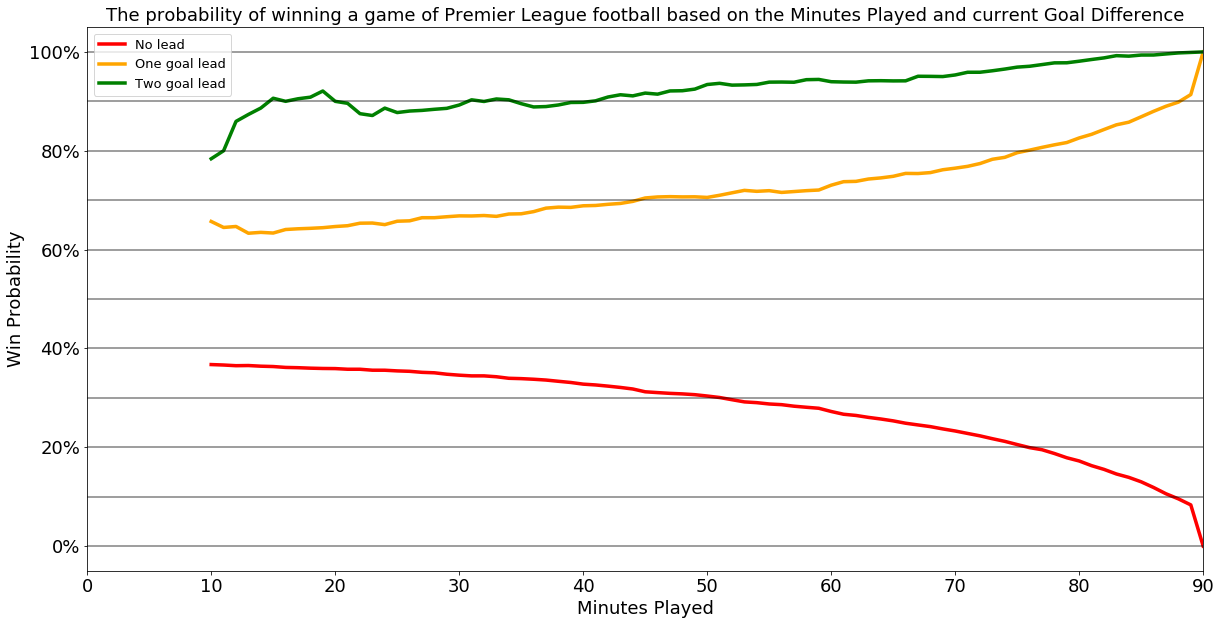

In [41]:
plt.figure(figsize=(20,10))

plt.plot(x, y_0, color = 'red', linewidth = 3.5, label = 'No lead ')
plt.plot(x, y_1, color = 'orange', linewidth = 3.5, label = 'One goal lead')
plt.plot(x, y_2, color = 'green', linewidth = 3.5, label = 'Two goal lead')
plt.legend(loc='upper left' , prop={'size': 13})

plt.plot([0, 90], [0, 0], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.1, 0.1], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.2, 0.2], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.3, 0.3], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.4, 0.4], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.5, 0.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.6, 0.6], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.7, 0.7], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.8, 0.8], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.9, 0.9], color = 'black', alpha=0.5)
plt.plot([0, 90], [1, 1], color = 'black', alpha=0.5)

plt.xlim(0,90)

plt.tick_params(axis='both', which='major', labelsize=18)

plt.title('The probability of winning a game of Premier League football based on the Minutes Played and current Goal Difference', fontsize=18)
plt.xlabel('Minutes Played', fontsize=18)
plt.ylabel('Win Probability', fontsize=18)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 



The ‘danger’ of a two goal lead is displayed by the green line representing it. A team winning by two goals has approximately 90% chance of winning the game from the 10th to 40th minute, from there it gradually increases to 100% in the 90th minute. This is anything but a dangerous scoreline. Therefore, as expected, the graph dispels the myth that "a two goal lead is the most dangerous scoreline in football".

The other lines on the plot show a team with a one goal lead has approximately a 65% chance of winning the game, rising gradually to 100% in the 90th minute. This line is below the two goal lead line for all values of t and therefore, by definition, is more ‘dangerous’.

A team that is drawing has approximately a 35% chance of winning the game dropping gradually to 0% at 90 minutes.  

The lines representing a one goal lead and no lead show an increase in the gradient in the final few minutes of the game, this is because a high proportion of goals in football are scored in this period. There is also a sharp jump in the win probabilities between the 89th and 90th minute for both the one goal lead and no lead, this is caused by the decision to consider all goals scored in added time to have been scored in the 90th minute.This results in an artificially inflated figure for goals scored in the 90th minute.

The next objective is to attempt to quantify the value of each scoreline. In order to do this an expected points model will be used, this aims to show how many points a team can expect to receive from a game based on the same inputs as before. To do this the probability of winning the game is multiplied by three (three points for a win in the Premier League), the probability of drawing the game is multiplied by one (one point for a draw) and then add these values together. 

In [20]:
def xPTS (t, gd):
    return(3*model(t, gd)[0] + model(t, gd)[1])

For example, given the same scenario as above: a team is winning by one goal in the 53rd minute, the expected points can be found like so:

In [21]:
xPTS(53, 1)

2.3622881355932206

So the team can expect to receive 2.36 points from the game.

In [22]:
x = np.linspace(10, 90 , 81)
def plot_xPTS(gd):
    plot_list = []
    for t in x:
        plot = xPTS(t, gd)
        
        plot_list.append(plot)
       
    return(plot_list)

In [23]:
z_0 = plot_xPTS(0)

In [24]:
z_1 = plot_xPTS(1)

In [30]:
z_2 = plot_xPTS(2)


In [31]:
z_neg1 = plot_xPTS(-1)

In [32]:
z_neg2 = plot_xPTS(-2)

The plot below shows lines representing the expected points of a team winning by two goals, winning by one goal, drawing, losing by one goal and losing by two goals. Like before, values are plotted for each minute from the 10th to the 90th.


Text(0, 0.5, 'Expected Points')

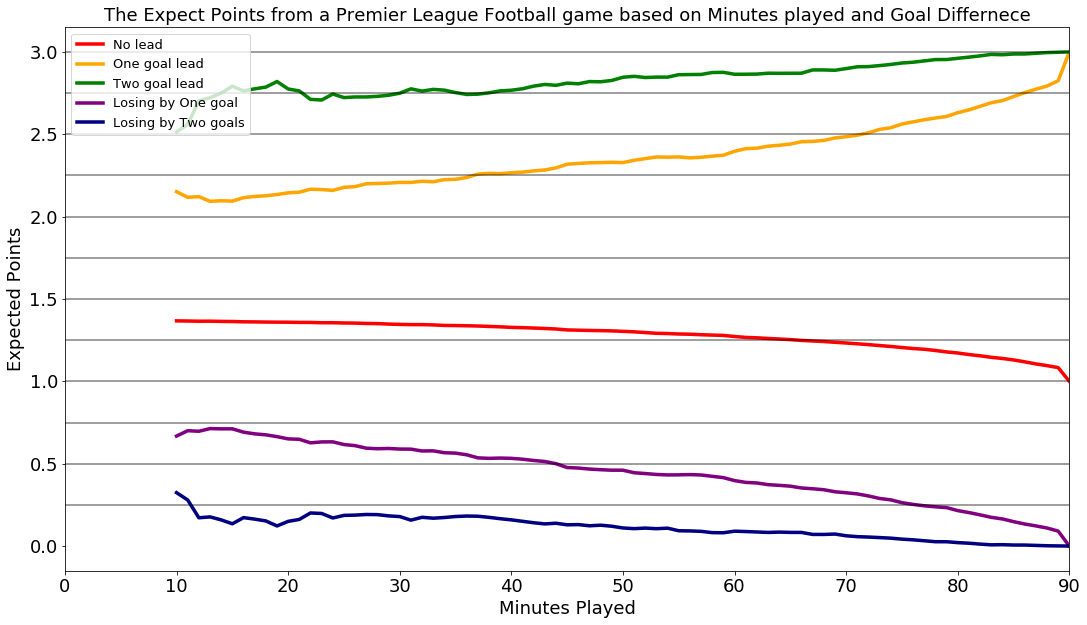

In [46]:
plt.figure(figsize=(18,10))

plt.plot(x, z_0, color = 'red', linewidth = 3.5, label = 'No lead ')
plt.plot(x, z_1, color = 'orange', linewidth = 3.5, label = 'One goal lead')
plt.plot(x, z_2, color = 'green', linewidth = 3.5, label = 'Two goal lead')
plt.plot(x, z_neg1, color = 'purple', linewidth = 3.5, label = 'Losing by One goal')
plt.plot(x, z_neg2, color = 'navy', linewidth = 3.5, label = 'Losing by Two goals')
plt.legend(loc='upper left' , prop={'size': 13})

plt.plot([0, 90], [0.25, 0.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.5, 0.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.75, 0.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [1, 1], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.25, 1.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.5, 1.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.75, 1.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [2, 2], color = 'black', alpha=0.5)
plt.plot([0, 90], [2.25, 2.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [2.5, 2.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [2.75, 2.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [3, 3], color = 'black', alpha=0.5)



plt.xlim(0,90)

plt.tick_params(axis='both', which='major', labelsize=18)

plt.title('The Expect Points from a Premier League Football game based on Minutes played and Goal Differnece', fontsize=18)
plt.xlabel('Minutes Played' , fontsize=18)
plt.ylabel('Expected Points', fontsize=18)





Firstly, as you would expect, the plot shows the more goals a team is winning by the higher the points they can expect to receive. The one and two goal lead lines end at three (three points for a win), the no lead line ends at one (one point for a draw) and the losing by one and two goal lines end at zero (zero points for a draw). 

The lines representing the expected points are not flat, this means the points a team can expect to receive is affected by the minutes played, when the current goal difference is held constant. The expected points for teams that are winning increases as minutes played increases and the expected points for teams that are losing or drawing decreases as minutes played increases. Because of this, a goal scored at one point in the game is worth a different amount of expected points to a goal scored at another.

As well as being affected by the timing, the value of a goal is affected by the current scoreline. The increase (or decrease) in the points a team can expect to receive when a goal is scored (or conceded) is represented by the gap between two lines. There is a large increase in expected points by going from losing by one goal to drawing or drawing to winning by one goal. This means that, in terms of expected points, these are the most valuable goals to score. Going from losing by two goals to one goal and going from winning by one goal to two goals has a smaller impact on the points a team can expect. This pattern continues for games with higher scorelines (this is not plotted as the graph is already relatively complex). Therefore, each goal scored after taking the lead in a game is less valuable than the previous goal scored. In a future report, the effects of scoring or conceding a goal for a number of different scorelines will be discussed.

By this point, most readers are probably confident that a 2-0 lead is not particularly ‘dangerous’. However, just to show how ‘safe’ the lead is, the line which represents a two goal lead will be investigated further. It shows a team can expect to receive approximately 2.75 points up until the 40th minute rising gradually to 3 in the 90th minute. Therefore, if a team were to take a ‘dangerous’ two goal lead at any point in a game, they can expect a minimum of 2.75 points. If this were to happen in every one of the 38 games a team plays in a Premier League season they would expect to end the season with 104.5 points, 4.5 points more than the current record for points total in a single premier league season set by Manchester City in 2018/19. 

The likely cause of the misconception that a 2-0 lead is “dangerous” is confirmation bias. When a team is able to come back from two goals down and get a result, this sticks in people's mind as ‘the day their team heroically came back against the odds’ or ‘the day their team threw away a seemingly easy win’. However in the 90% of cases that the team winning 2-0 goes on to win the game, it is quickly forgotten by many. This leads many to believe that these events happen much more frequently than they really do.




# Limitations

Obviously no model is perfect, the limitations of this particular model will now be discussed.

#### Added time 
All goals scored in added time are considered to have been scored in the 45th or 90th minute (depending on which half they were scored) and it is assumed that every game finished at exactly 90 minutes. This causes a jump in probability from the 89th minute to the 90th minute. The model assumes a team winning in the 90th minute is guaranteed to win, however this is obviously not the case.

#### Sample size 
Although the dataset contains 4560 games of football (which would be considered a large sample size), not many of these games contained goals very early in the game. For example looking at games in which a team was winning by two goals in the 5th minute: 


In [34]:
len(np.where(goal_diff(5) == 2)[0].tolist()) + len(np.where(goal_diff(5) == -2)[0].tolist())

10

This occurred in only 10 of the 4560 games, thus there is a sample size of 10. This means each sample point (game) has a large effect on the result of the model. This is why the graphs are plotted from 10 minutes onwards, as values below this point are less valid. However it is important to realise that it is not as black and white as all values before the 10th minute are ‘invalid’ and values after the 10th minute are ‘valid’. The 10th minute cutoff was an informed decision however it is just an arbitrary point. The small sample size also explains the fluctuation in findings for lower values in the line representing a two goal lead. 

#### Precision of the model
There are a huge number of factors that will affect how likely a team is to win a game of football, this model takes just two of these into account: minutes played and current goal difference. In a future report, ways to improve the model will be investigated. However, this improvement will be in direct contradiction with the limitation mentioned above, if more variables are introduced the database is split up and the sample size will be reduced further.

# Conclusion

This report explored if "2-0 is the most dangerous lead in football". To do this a model used to calculate the probability of a team winning, losing or drawing based on the minutes played and the current scoreline. From here, an expected points model was used to quantify the ‘value’ of each scoreline and the findings are discussed. The evidence in the report firmly disputes the claim that "2-0 is the most dangerous lead in football"